In [149]:
# Load libraries
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import datasets #Import scikit-learn dataset library
import pandas as pd

In [150]:
# Task 1 : Load dataset using sklearn 
dataset = datasets.fetch_lfw_people(min_faces_per_person=60)

print("Shape: ", dataset.data.shape)
print("Labels: ", dataset.target_names)

Shape:  (1348, 2914)
Labels:  ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [151]:
dataset.data

array([[138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
          1.6666666 ,   0.33333334],
       [ 71.333336  ,  56.        ,  67.666664  , ..., 247.66667   ,
        243.        , 238.33333   ],
       [ 84.333336  ,  97.333336  ,  72.333336  , ..., 114.        ,
        194.33333   , 241.        ],
       ...,
       [ 29.333334  ,  29.        ,  29.333334  , ..., 145.        ,
        147.        , 141.66667   ],
       [ 49.333332  ,  55.666668  ,  76.666664  , ..., 186.33333   ,
        176.33333   , 161.        ],
       [ 31.        ,  26.333334  ,  28.        , ...,  34.        ,
         42.        ,  69.666664  ]], dtype=float32)

In [152]:
# Task 2: Show the descriptions / Statistical Summary of the dataset
df = pd.DataFrame(dataset.data)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888,2889,2890,2891,2892,2893,2894,2895,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,...,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,90.959473,93.834541,99.579391,108.365822,118.672813,128.160995,136.188644,142.605530,147.633499,151.778259,155.579880,159.136353,162.407120,165.367798,167.848938,169.729950,171.303116,172.647522,173.804962,174.783295,175.627625,176.227310,176.468506,176.680786,176.695557,176.376541,175.938492,175.321304,174.342300,173.189896,171.781174,169.864258,167.686371,165.351822,162.717300,159.376907,155.626572,151.503647,147.100327,141.671280,...,112.182877,112.850380,110.882614,108.575691,106.726028,104.498810,101.368172,98.270065,97.518593,98.284065,99.661224,101.569466,103.137878,104.034218,104.562538,105.300201,105.907722,106.067238,105.857048,105.273521,104.272530,102.899849,101.482384,99.761589,97.755447,96.000755,95.097412,95.997459,99.104126,103.465797,108.888031,115.846672,122.790558,127.891586,129.422119,127.105553,123.113953,118.189690,111.794380,105.836021
std,46.822746,45.766994,44.650307,43.651173,42.577927,41.350433,39.039383,36.985294,35.904938,35.207523,34.400867,33.618378,32.583183,31.761698,31.165813,30.747919,30.485334,30.205093,29.804638,29.497532,29.358898,29.301933,29.316559,29.333279,29.261948,29.245277,29.179058,29.105982,29.445961,30.140682,30.877747,31.471975,32.194965,32.907959,33.742149,34.681625,35.571655,36.561653,37.536953,38.854473,...,72.006416,70.732178,68.048164,63.213619,59.143021,55.563320,51.004330,45.954075,42.501785,40.151196,38.357937,37.714893,37.210312,36.628178,36.561596,36.628410,37.010365,37.108395,37.057869,36.758396,36.580013,36.589306,36.439365,36.209236,36.521282,38.583160,41.491096,44.948719,48.803013,53.285152,58.379681,62.784744,67.517990,71.266953,73.400261,75.469551,77.299377,78.179665,78.323830,79.128014
min,0.000000,0.000000,0.000000,0.666667,1.000000,1.666667,2.333333,2.333333,5.000000,10.666667,10.666667,12.000000,13.333333,15.000000,16.666666,18.000000,20.000000,21.000000,20.666666,20.666666,21.333334,22.333334,24.666666,25.666666,25.666666,26.000000,26.000000,27.000000,27.000000,26.333334,23.666666,21.000000,19.000000,16.666666,14.000000,14.333333,14.333333,11.666667,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.666667,2.333333,1.666667,5.333333,6.333333,6.000000,7.333333,8.666667,6.666667,7.333333,6.333333,6.000000,6.333333,8.333333,9.000000,9.666667,7.333333,4.666667,1.666667,1.000000,1.000000,2.000000,1.666667,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.249999,59.666668,67.333336,79.250002,92.583332,102.666664,112.000000,119.250002,124.333336,129.666672,134.916668,138.000000,142.000000,146.249996,148.000000,150.666672,153.000000,155.000000,156.000000,157.666672,159.000000,159.583336,159.666672,159.000000,159.249996,

In [153]:
df['class'] = dataset.target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888,2889,2890,2891,2892,2893,2894,2895,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,class
0,138.000000,135.666672,127.666664,120.666664,117.000000,119.666664,126.000000,133.333328,138.000000,143.666672,149.333328,152.000000,154.333328,157.333328,164.333328,166.666672,167.000000,166.000000,159.000000,157.666672,160.333328,162.666672,169.000000,166.333328,160.000000,156.666672,153.666672,154.666672,152.333328,147.333328,142.333328,136.000000,133.000000,130.000000,126.666664,123.666664,113.666664,101.666664,88.333336,83.666664,...,70.000000,63.666668,63.000000,65.666664,73.000000,76.333336,74.666664,75.000000,78.000000,79.666664,77.666664,78.000000,85.666664,95.333336,97.333336,94.000000,93.333336,93.666664,92.666664,92.333336,91.666664,89.000000,86.666664,81.000000,69.666664,56.333332,59.000000,96.000000,153.000000,113.000000,24.666666,4.666667,2.666667,1.333333,0.333333,1.333333,1.666667,1.666667,0.333333,1
1,71.333336,56.000000,67.666664,91.333336,91.666664,72.333336,101.666664,124.666664,124.333336,127.666664,134.000000,140.333328,144.666672,143.333328,134.000000,117.000000,105.333336,100.000000,93.333336,94.333336,98.333336,103.333336,102.666664,100.666664,102.000000,102.333336,105.000000,112.333336,119.000000,126.666664,134.333328,137.666672,147.333328,150.000000,147.666672,148.666672,149.000000,144.666672,141.000000,138.333328,...,15.666667,20.666666,105.666664,192.333328,213.333328,228.333328,226.000000,194.333328,127.333336,71.666664,66.666664,80.000000,84.333336,82.333336,80.333336,80.000000,81.333336,83.000000,80.000000,77.666664,75.000000,69.333336,61.666668,56.000000,40.666668,26.666666,39.000000,106.333336,189.000000,236.666672,248.333328,252.666672,253.333328,253.000000,253.666672,251.666672,247.666672,243.000000,238.333328,3
2,84.333336,97.333336,72.333336,56.666668,95.333336,118.333336,123.666664,128.666672,130.333328,134.666672,133.666672,143.666672,155.333328,160.333328,160.000000,154.333328,157.333328,161.000000,167.666672,173.666672,178.000000,177.333328,176.000000,177.333328,175.333328,175.333328,175.333328,175.000000,171.333328,169.333328,167.333328,160.333328,156.333328,154.333328,155.666672,152.333328,147.333328,147.333328,145.666672,136.333328,...,117.666664,179.333328,107.000000,65.333336,72.000000,81.666664,97.666664,109.333336,111.333336,114.666664,126.333336,135.666672,136.000000,135.333328,133.666672,135.000000,140.000000,141.333328,138.333328,126.333336,109.666664,96.000000,83.000000,75.333336,73.666664,76.333336,77.666664,79.666664,83.000000,83.333336,91.000000,106.666664,116.000000,123.000000,118.333336,102.000000,114.000000,194.333328,241.000000,3
3,68.333336,81.666664,121.666664,135.000000,138.666672,141.333328,142.000000,148.333328,159.666672,171.000000,175.333328,177.333328,180.333328,178.000000,181.000000,185.666672,188.666672,187.666672,184.000000,188.000000,191.666672,186.666672,182.333328,183.000000,183.000000,182.666672,178.333328,173.333328,171.333328,166.666672,166.333328,162.333328,157.000000,154.666672,147.666672,136.000000,128.333328,130.000000,128.333328,119.666664,...,237.333328,241.666672,243.000000,210.000000,138.000000,108.000000,107.333336,102.000000,97.666664,97.000000,97.666664,100.333336,105.000000,109.333336,113.000000,114.666664,111.000000,107.000000,105.333336,100.333336,93.666664,92.000000,92.333336,86.000000,82.666664,90.666664,95.000000,93.000000,94.000000,90.000000,104.000000,165.000000,224.000000,232.333328,228.666672,230.000000,229.333328,224.333328,206.666672,3
4,56.666668,55.333332,47.333332,47.000000,50.000000,44.666668,44.666668,52.000000,62.333332,55.000000,55.666668,57.666668,64.333336,72.000000,75.000000,79.333336,85.666664,89.333336,95.000000,100.333336,101.666664,102.333336,102.000000,102.666664,108.000000,111.000000,109.666664,117.00

In [154]:
# Task 3: Show the class distribution and data statistics
df.groupby('class').size()

class
0     77
1    236
2    121
3    530
4    109
5     71
6     60
7    144
dtype: int64

In [155]:
# Task 4: Split dataset into training set and test set into 75 and 25
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25,random_state=109)

In [156]:
# Task 5: Show the model accuracy 
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("SVM Classifier Accuracy :", metrics.accuracy_score(y_test, y_pred))

SVM Classifier Accuracy : 0.8724035608308606


In [157]:
# Task 6: Evaluate the model performance (Confusion metrics, recall, precision and f1)
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix: \n')
print(confusion_matrix(y_test, y_pred))

print('\n\n Classification Report: \n')
print(classification_report(y_test, y_pred))

Confusion Matrix: 

[[  6   2   1   1   0   1   0   1]
 [  2  53   0   4   0   0   0   2]
 [  1   1  16   0   0   0   0   0]
 [  0   7   2 144   0   1   0   1]
 [  0   2   0   0  22   0   0   0]
 [  0   0   0   1   2  13   0   1]
 [  0   0   0   1   0   1  14   2]
 [  1   2   1   1   1   0   0  26]]


 Classification Report: 

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.79      0.87      0.83        61
           2       0.80      0.89      0.84        18
           3       0.95      0.93      0.94       155
           4       0.88      0.92      0.90        24
           5       0.81      0.76      0.79        17
           6       1.00      0.78      0.88        18
           7       0.79      0.81      0.80        32

    accuracy                           0.87       337
   macro avg       0.83      0.81      0.81       337
weighted avg       0.87      0.87      0.87       337



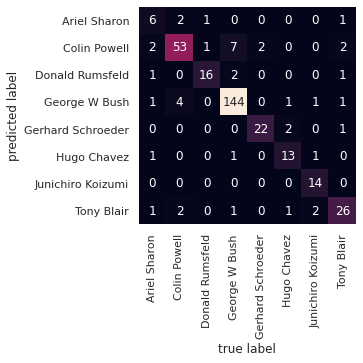

In [158]:
# Task 7: Draw the confusion metrics graphically using heatmap
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=dataset.target_names, yticklabels=dataset.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');

Test #1


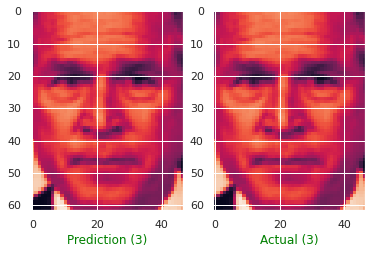

Test #2


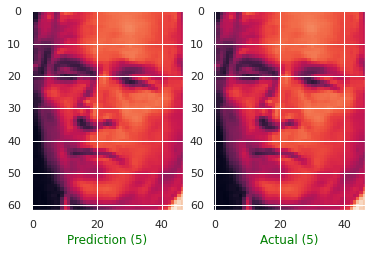

Test #3


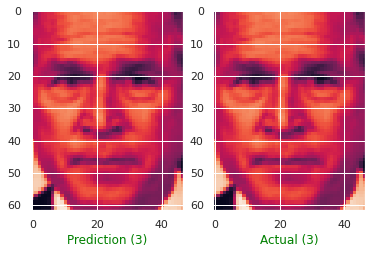

Test #4


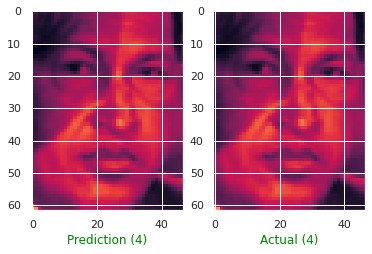

Test #5


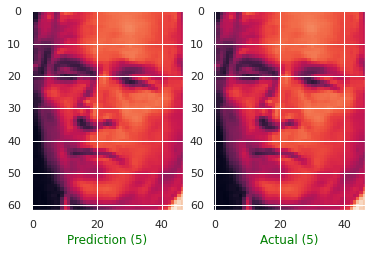

Test #6


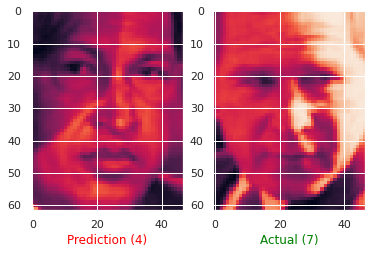

Test #7


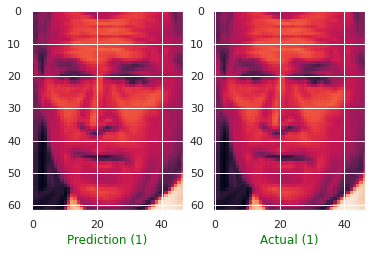

Test #8


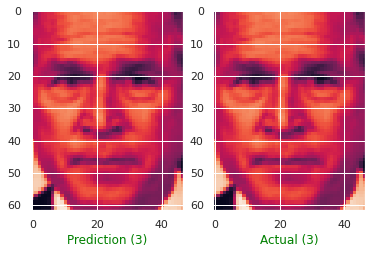

Test #9


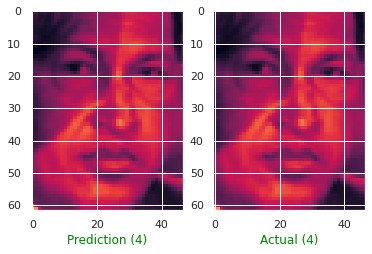

Test #10


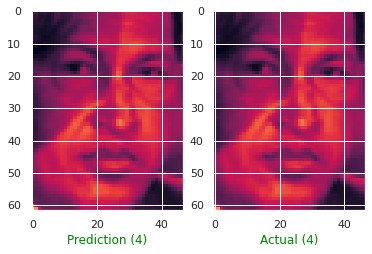

In [162]:
# Task 8: Show few of the test images along with their predicted values and incorrect labels in red color.
import numpy as np
images = dataset.images

green_color = "#008000"
red_color = "#FF0000"

for index, data in enumerate(X_test[:10]):
  prediction = clf.predict([data])[0]
  actual = y_test[index]
  
  print("Test #"+str(index+1))
  f = plt.figure()
  ax1 = f.add_subplot(1, 2, 1)
  ax1.set_xlabel(f"Prediction ({prediction})", color=green_color if prediction == actual else red_color)
  plt.imshow(images[prediction])
  ax2 = f.add_subplot(1, 2, 2)
  ax2.set_xlabel(f"Actual ({actual})", color=green_color)
  plt.imshow(images[actual])
  plt.show(block=True)

In [163]:
# Task 9: Show performance of different kernel and finalize or optimized for the best performance 
def get_clf_and_accuracy(kernel_name):
  clf = svm.SVC(kernel=kernel_name)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return (clf, metrics.accuracy_score(y_test, y_pred))

kernels = ["linear", "poly", "rbf"]
best_accuracy = 0
best_classifier = None
best_kernel = None
for kernel in kernels:
  classifier, accuracy = get_clf_and_accuracy(kernel)
  print(f"Accuracy for {kernel} kernel is", accuracy)
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_kernel = kernel
    best_classifier = classifier

print(f"Best/Optimized performance is given by \"{best_kernel}\" kernel")

Accuracy for linear kernel is 0.8724035608308606
Accuracy for poly kernel is 0.8545994065281899
Accuracy for rbf kernel is 0.7685459940652819
Best/Optimized performance is given by "linear" kernel
